# **Entrega 2 - Reconocimiento de patrones**

In [2]:
# Importar librerias necesarias. Si necesita mas, incluyalas aqui
import os
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


## **Ejercicio 1**
Realice la estructuración de los siguientes [archivos](https://drive.google.com/file/d/1P6GoINnF1N68RrNQ9dXAI6dUfzO1IiZD/view?usp=sharing). A continuación, cargue las imágenes y guárdelas en una lista con el nombre que ud desee. Esta lista será la base para la realización de los demás ejercicios. En esta sección, puede añadir las celdas de código que considere. 

In [3]:
path = "/content/drive/MyDrive/PatronesClass2022/imagenesE2/"

In [4]:

#---- Introduzca su codigo aqui
def dataStructure (files, extensions):
  for file_ in os.listdir(path):
    if os.path.splitext(file_)[1].lower() in extensions:

      files.append(path+file_)

  return files


#---- Muestre imagen


In [5]:
extensions = ['.jpeg','.png','.jpg','.tif','.bmp','.gif']
files = []

dataStructure(files,extensions)

['/content/drive/MyDrive/PatronesClass2022/imagenesE2/Baboon.png',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/243345.png',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/7687897.png',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/645645jh.jpg',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/56rgfy56.jpg',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/54edsf.png',
 '/content/drive/MyDrive/PatronesClass2022/imagenesE2/sudoku1.jpg']

In [6]:
print(len(files))

7


In [7]:
images = []
for image in files:
  image = cv2.imread(image)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  image = cv2.resize(image,(300,300))

  images.append(image)

print(len(images))

7


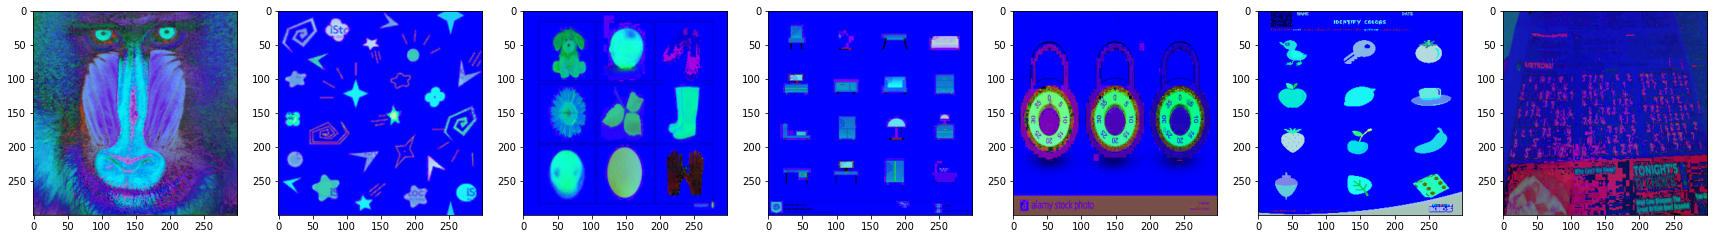

In [8]:
_,axes =  plt.subplots(1,len(images),figsize = (30,8))
axes =  axes.ravel()

for i, image in enumerate(images): 
  axes[i].imshow(image)

## **Ejercicio 2**

Realice la segmentación de todos los objetos de color amarillo en todas las imágenes ya estructuradas. La imágen resultado debe ser similar a la mostrada [aquí](https://drive.google.com/file/d/1QKtRcSsbDHrz4NkrDlTKubLYf8FMX-GX/view?usp=sharing). En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** recuerden que es más fácil realizar segmentación por color con imágenes en HSV. Para ayudarles, les recomiendo que realicen esto a partir del histograma de una imagen y luego extrapolen a las demás. También les recomiendo que consulten sobre los valores de los rangos del color en HSV.

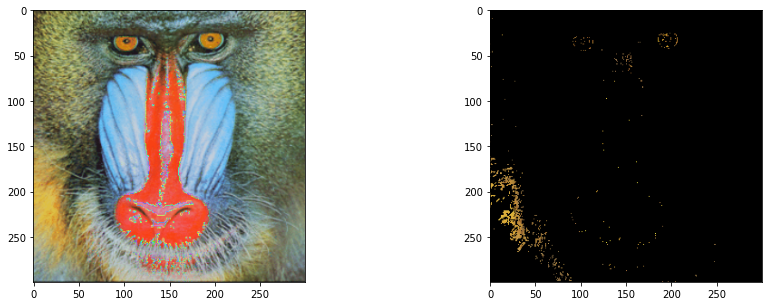

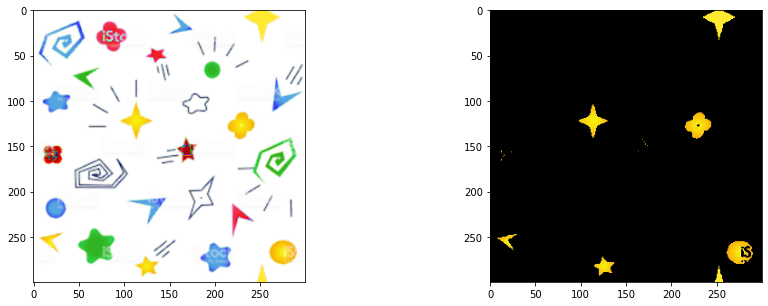

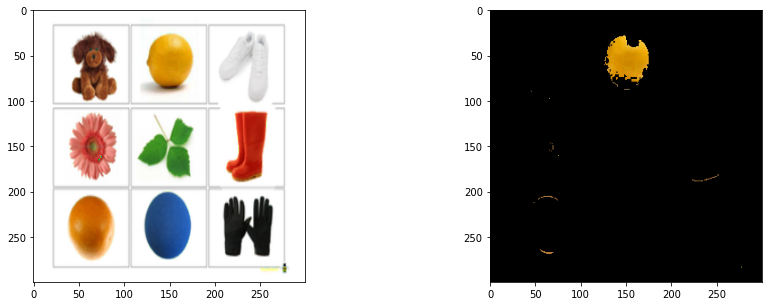

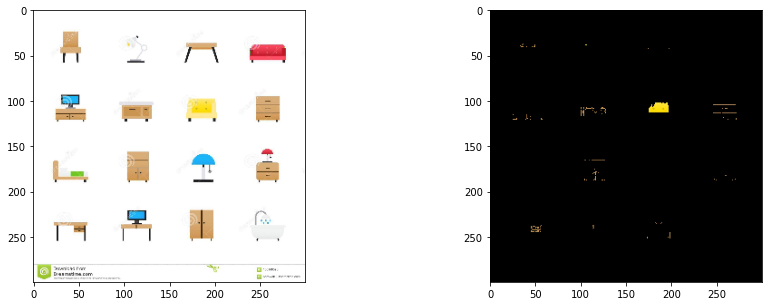

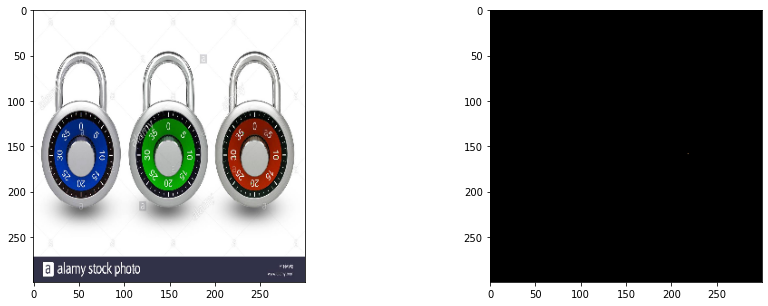

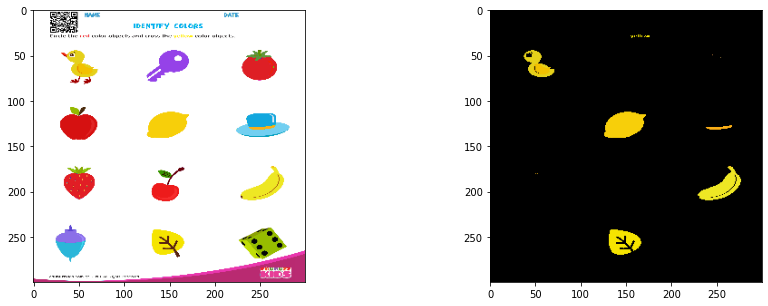

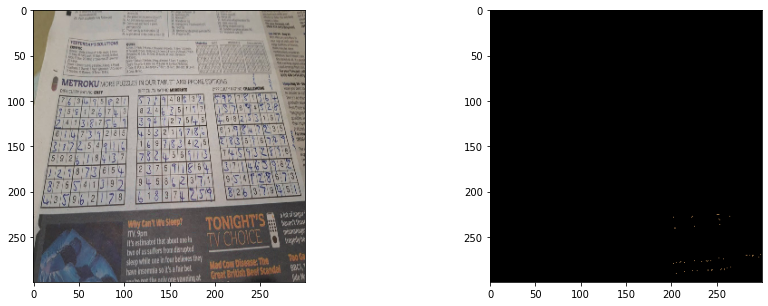

In [9]:
#---- Introduzca su codigo aqui
lower_yellow =(15,120,120)
upper_yellow =(20,200,200)

yellow_bajo = (20,180,180)
yellow_alto = (30,255,255)

for img in images:
  mask = cv2.inRange(img, lower_yellow, upper_yellow)
  maskForge = cv2.inRange(img, yellow_bajo,yellow_alto)
  maskAll = cv2.add(mask,maskForge)
  res = cv2.bitwise_and(img, img, mask=maskAll)
  
#---- Muestre imagen
  fig,axes = plt.subplots(1,2, figsize = (15,5))
  axes[0].imshow(cv2.cvtColor(img,cv2.COLOR_HSV2RGB))
  axes[1].imshow(cv2.cvtColor(res,cv2.COLOR_HSV2RGB))


## **Ejercicio 3**

Realice la segmentación de de todos los objetos en todas las imágenes ya estructuradas en escala de grises (ver la siguiente [imagen](https://drive.google.com/file/d/1qRz_iDHFv9v_6vjDsAFEFgjv6xjfGQgc/view?usp=sharing)). Realice la extracción del fondo de la imágen y deje solo los objetos, tal y como se muestran en las 2 columnas de la imagen. Las imágenes de cada columna se calculan de manera independiente. En esta sección, puede añadir las celdas de código que considere.  \\

**AYUDA:** Las dos imágenes pueden obtenerse usando umbralización. 

In [19]:
#---- Introduzca su codigo aqui
gray = []
for img in files:
   grayImage = cv2.imread(img,0)
   grayImage = cv2.resize(grayImage, (300,300))
   gray.append(grayImage)

print (len(gray))

#---- Muestre imagen

7


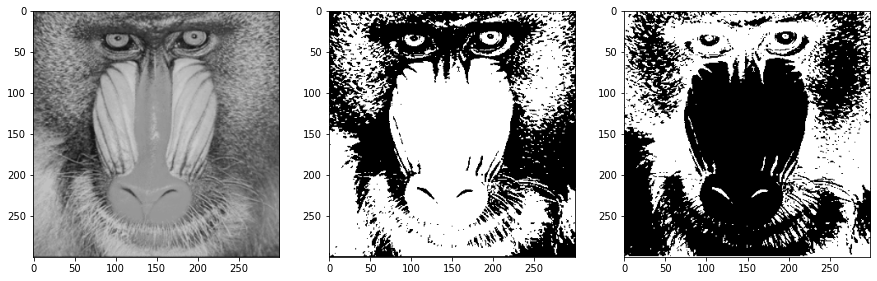

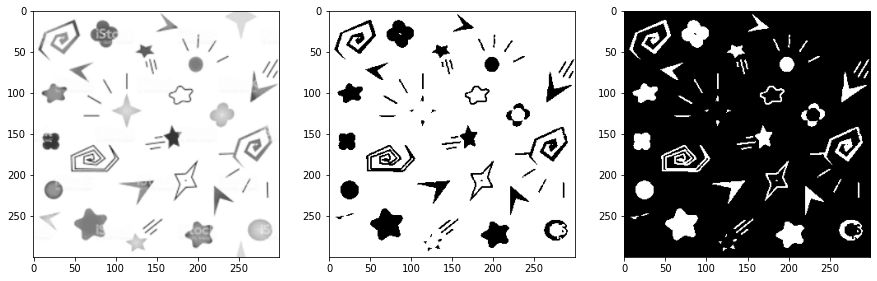

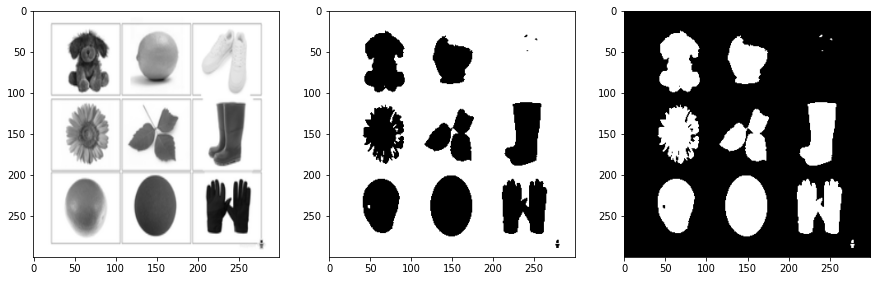

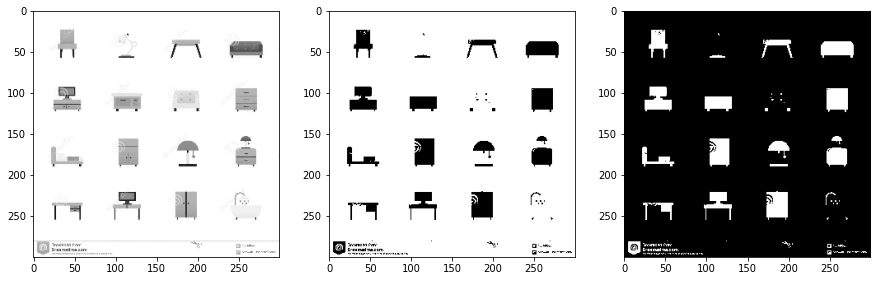

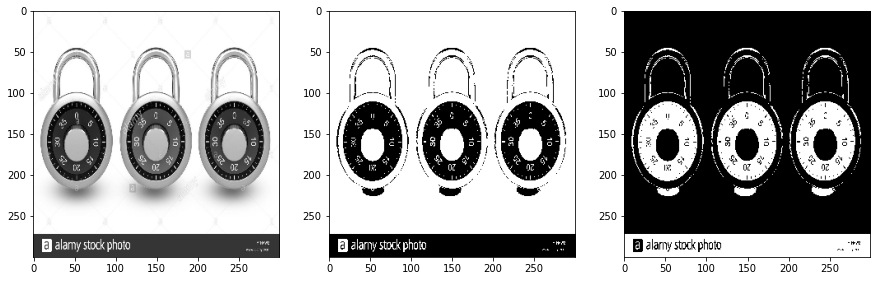

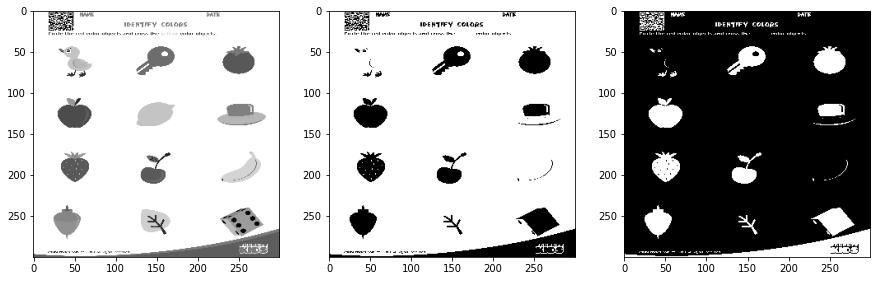

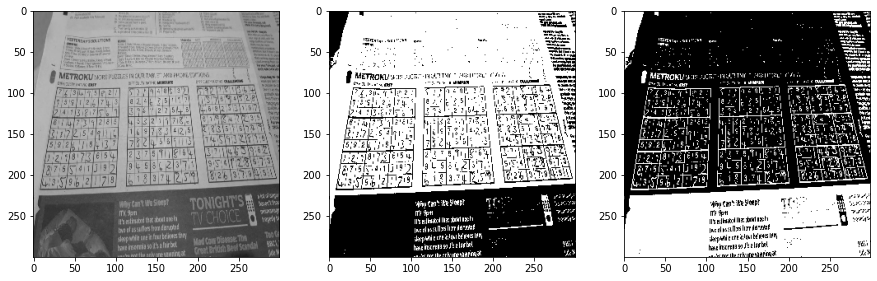

In [32]:
for i in gray:
  ret, tresh = cv2.threshold(i,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  ret2,tresh2 = cv2.threshold(i,100,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  fig,axes = plt.subplots(1,3, figsize = (15,5))
  axes[0].imshow(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))
  axes[1].imshow(tresh,'gray')
  axes[2].imshow(tresh2,'gray')


## **Ejercicio 4**

A partir de la imagen [sudoku1.jpg](https://drive.google.com/file/d/14tjOAYXvLhl38AFsVyie82MGAlXPeYH0/view?usp=sharing), extraiga el siguiente sudoku y extraiga la siguiente [perspectiva](https://drive.google.com/file/d/1IJH6-cVDJOTyoWwdJofjHKoocba5eyKJ/view?usp=sharing) \\

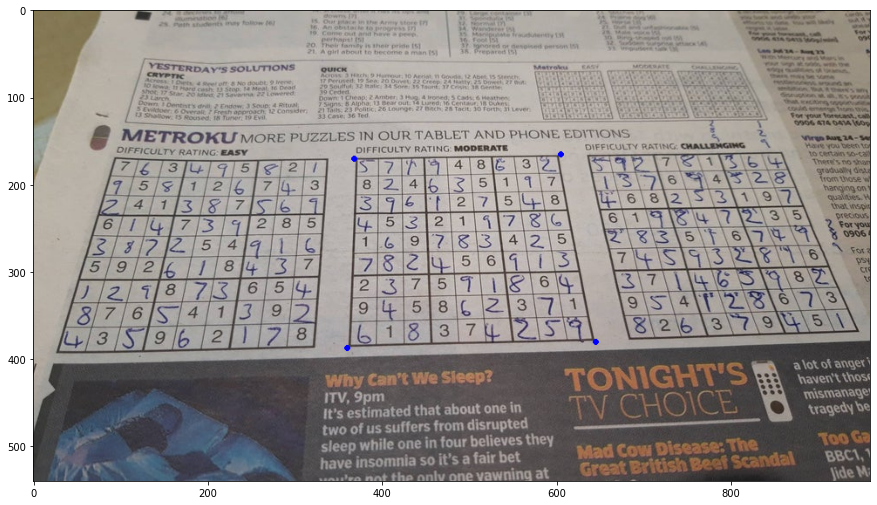

In [ ]:
#---- Introduzca su codigo aqui
image = cv2.imread('/content/drive/MyDrive/PatronesClass2022/imagenesE2/sudoku1.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

cv2.circle(image, ( 368 , 170 ), 2, [0,0,255],2)
cv2.circle(image, ( 360 , 387 ), 2, [0,0,255],2)
cv2.circle(image, ( 605 , 165 ), 2, [0,0,255],2)
cv2.circle(image, ( 645 , 380 ), 2, [0,0,255],2)
plt.figure(figsize=(15,10))
plt.imshow(image)

points = np.float32([[ 368 , 170 ],[ 360 , 387 ],[ 605 , 165 ],[ 645 , 380 ]])

output_size = (300,300)
mapping = np.float32([[0,0],[300,0],[0,300],[300,300]])

#---- Muestre imagen


In [ ]:
Perspective = cv2.getPerspectiveTransform(points, mapping)
imagePerspective = cv2.warpPerspective(image, Perspective, output_size)

imagePerspective = cv2.flip(imagePerspective,0)
imagePerspective = cv2.rotate(imagePerspective, cv2.ROTATE_90_CLOCKWISE) 

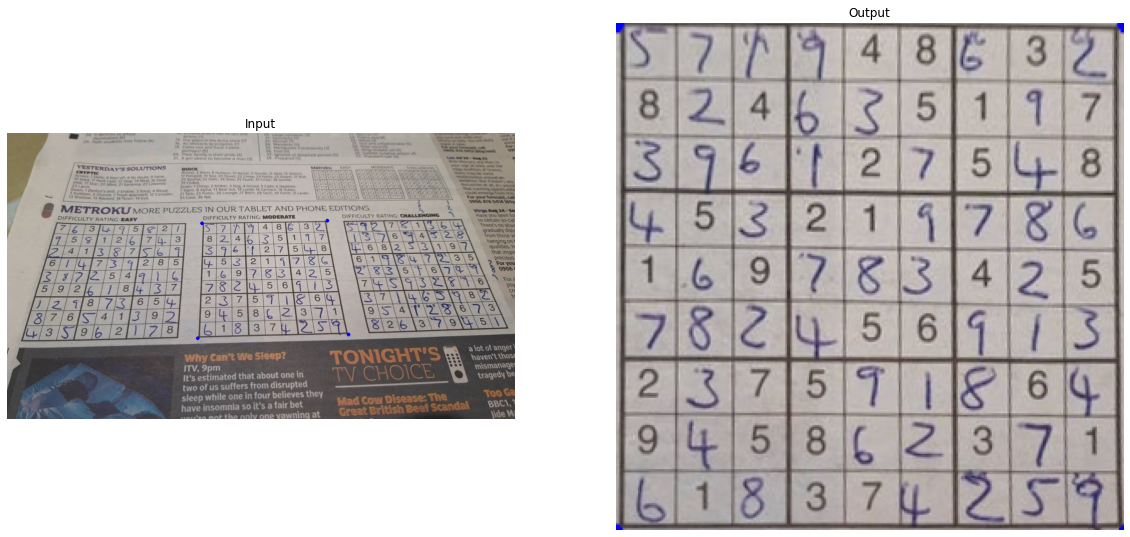

In [ ]:
_, axes = plt.subplots(1,2, figsize = (20,10))
axes[0].imshow(image); axes[0].set_title('Input'); axes[0].set_axis_off()
axes[1].imshow(imagePerspective); axes[1].set_title('Output'); axes[1].set_axis_off()
plt.show()